## Exercise: Print your name, and run the Flow
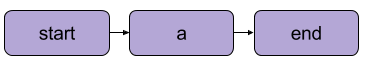

**Anatomy of a workflow:**
* 3 steps create a DAG
* `self.next` to construct it.
* print hello


`%%writefile` creates the `hello_flow.py` file with the following contents.

In [ ]:
%%writefile hello_flow.py

from metaflow import FlowSpec, step


class HelloFlow(FlowSpec):
    @step
    def start(self):
        """
        This is the 'start' step. All flows must have a step named 'start' that
        is the first step in the flow.
        """
        self.next(self.hello)

    @step
    def hello(self):
        print("Hello <TODO>.")
        self.next(self.end)

    @step
    def end(self):
        """
        This is the 'end' step. All flows must have an 'end' step, which is the
        last step in the flow.
        """
        print("HelloFlow is all done.")


if __name__ == "__main__":
    HelloFlow()

## Run the Flow!

In [ ]:
!python hello_flow.py run

# Exercise: Flow update and inspect Flow state
* Append `".a"` to `self.logbook`
* Inspect state in ui
  - Click on Flow and drill down

In [ ]:
%%writefile linear_flow.py
from metaflow import FlowSpec, step, current

class LinearFlow(FlowSpec):

    @step
    def start(self):
        self.logbook = current.step_name
        self.next(self.a)

    @step
    def a(self):
        # <TODO>
        self.next(self.end)

    @step
    def end(self):
        self.logbook += f".{current.step_name}"
        is_success = self.logbook == 'start.a.end'
        print(f"Exercise is_success: {is_success}")

if __name__ == '__main__':
    LinearFlow()

In [ ]:
!python linear_flow.py run